#              Merging the Data and Storing in a Database/Visualizing Data

# Introduction:

This entire project is about,  

Retrieving data from 3 different sources, website, API and flat file.  
Cleansing and blending the data together to single table/dataframe by using sql statements in sqlite3.  
Using visualizations to understand the data better.  
Present the data in the final human readable format.  

This is the milestone 5 of the weather project.  




# Step 1:

The previous dataframes for Flatfile, API data and website data which has been run in a all different Jupyter Notebook has been exported to csv file format by using the following command,

df.to_csv("C:\\Users\\Riaz\\Desktop\\MSDS\\Data Preparation\\Week11&12\\<filename.csv>",index=False)

We would be importing these files back to the sqlite database weather.db

# Step 2:  

Initializing and storing in database.  
Using the function to_sql to create the tables from the csv files and making the index as false.

In [161]:
import pandas as pd
import sqlite3

# Read the CSV file into a DataFrame
flatfile = pd.read_csv("C:\\Users\\Riaz\\Desktop\\MSDS\\Data Preparation\\Week11&12\\flatfile.csv")
apidata = pd.read_csv("C:\\Users\\Riaz\\Desktop\\MSDS\\Data Preparation\\Week11&12\\APIdata.csv")
websitedata = pd.read_csv("C:\\Users\\Riaz\\Desktop\\MSDS\\Data Preparation\\Week11&12\\websitedata.csv")

# Create a connection to the SQLite database
conn = sqlite3.connect('weather.db')

# Write the DataFrame to the SQLite database
flatfile.to_sql('flatfile', conn, if_exists='replace', index=False)
apidata.to_sql('apidata', conn, if_exists='replace', index=False)
websitedata.to_sql('websitedata', conn, if_exists='replace', index=False)

# Close the connection
conn.close()


# Step 3:  
Getting the names of total tables present in the database

In [162]:
conn = sqlite3.connect('weather.db')
cursor=conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables=cursor.fetchall()
print ("The total tables present in this weather database are,\n")
for table in tables:
    print (table[0])
conn.close()

The total tables present in this weather database are,

flatfile
apidata
websitedata


# Step 4:  
Printing the first 5 rows of each table

In [164]:
with sqlite3.connect('weather.db') as conn:
    cursor=conn.cursor()
    
query = ["select * from apidata limit 5;","select * from flatfile limit 5;","select * from websitedata limit 5;"]
for quer in query:
    apirows=cursor.execute(quer)
    print ("The first 5 rows output of Query {}\n".format(quer))
    for row in apirows:
        print (row)
    print("\n")


The first 5 rows output of Query select * from apidata limit 5;

(33.6823, -84.161, 71.24, 74.39, 1020, 81, None)
(38.9326, -77.1706, 60.296, 63.662, 1030, 82, None)
(33.9321, -83.3525, 71.78, 72.59, 1015, 67, None)
(39.4567, -76.9696, 58.802, 62.582, 1000, 96, None)
(26.8234, -80.1387, 80.024, 84.2, 999, 73, None)


The first 5 rows output of Query select * from flatfile limit 5;

('USW00014734', 'NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US', 40.68275, -74.16927, 1.9, '2023-01-01', 8.05, None, None, None, 0.0, 0.0, 0.0, 52.0, 58.0, 45.0, None, 280.0, 280.0, None, None, 18.1, 23.0, 1.0, None, None, None, None, None, None, None)
('USW00014734', 'NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US', 40.68275, -74.16927, 1.9, '2023-01-02', 4.92, None, None, None, 0.05, 0.0, 0.0, 50.0, 59.0, 43.0, None, 260.0, 260.0, None, None, 15.0, 18.1, 1.0, None, None, None, None, None, None, None)
('USW00014734', 'NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US', 40.68275, -74.16927, 1.9, '2023-01-03', 3.36, Non

As seen from the above output, timezone information is present in website data alone, but not in apidata or flatfile data.  
Using join between tables, will populate timezone details in apidata with the known values from website data and will get the output for the place Lat=40.9158 and Lon=-81.1182.  
Lat/lon columns in websitedata table and latitude/longitude columns in apidata table is being used for primary key matching.

# Step 5:  

Establishing connection to weather database and joining two tables and selecting based on specific latitude and longitude values

In [165]:
with sqlite3.connect('weather.db') as conn:
    cursor=conn.cursor()
    rows=cursor.execute("select apidata.*,websitedata.Timezone from apidata join websitedata on websitedata.latitude=apidata.Lat and \
    websitedata.longitude=apidata.Lon where Lat=40.9158 and Lon=-81.1182")
    for row in rows:
        print (row)

# As seen from the below output 40.9158 latitude, -81.1182  longitude coordinates belong to EDT timezone.


(40.9158, -81.1182, 60.26, 64.6, 1008, 96, 'overcast clouds', 'EDT')


# Step 6:
Getting more information about the three tables which we have loaded

In [166]:
# Getting the column names and the information type for the tables to use further in analysis,

with sqlite3.connect('weather.db') as conn:
    cursor=conn.cursor()
    for table in ['websitedata','apidata','flatfile']:
        print (f"The columns of {table} are\n")
        for row in (cursor.execute(f"PRAGMA table_info({table})")):
            print (row)
        print("\n")

The columns of websitedata are

(0, 'Tmax', 'REAL', 0, None, 0)
(1, 'Tmin', 'REAL', 0, None, 0)
(2, 'Humidity', 'TEXT', 0, None, 0)
(3, 'Wind Speed', 'TEXT', 0, None, 0)
(4, 'Barometer', 'TEXT', 0, None, 0)
(5, 'Dewpoint', 'TEXT', 0, None, 0)
(6, 'Visibility', 'TEXT', 0, None, 0)
(7, 'Last update', 'TEXT', 0, None, 0)
(8, 'latitude', 'REAL', 0, None, 0)
(9, 'longitude', 'REAL', 0, None, 0)
(10, 'Timezone', 'TEXT', 0, None, 0)


The columns of apidata are

(0, 'Lat', 'REAL', 0, None, 0)
(1, 'Lon', 'REAL', 0, None, 0)
(2, 'Temp_min', 'REAL', 0, None, 0)
(3, 'Temp_max', 'REAL', 0, None, 0)
(4, 'Pressure', 'INTEGER', 0, None, 0)
(5, 'Humidity', 'INTEGER', 0, None, 0)
(6, 'General Weather is', 'TEXT', 0, None, 0)


The columns of flatfile are

(0, 'station', 'TEXT', 0, None, 0)
(1, 'name', 'TEXT', 0, None, 0)
(2, 'latitude', 'REAL', 0, None, 0)
(3, 'longitude', 'REAL', 0, None, 0)
(4, 'elevation', 'REAL', 0, None, 0)
(5, 'date', 'TEXT', 0, None, 0)
(6, 'avg_daily_wind_speed', 'REAL', 0, Non

# Step 7:  
Blending two tables using inner join on websitedata and apidata tables on the columns latitude and longitude and getting the results by also specifying the column names from both the tables selectively. 
read_sql function has been used to convert the sql output to dataframe.

In [167]:
with sqlite3.connect('weather.db') as conn:
    
    web_api_df = pd.read_sql("select w.Tmax,w.Tmin,a.Humidity,w.latitude,w.longitude,w.Timezone,a.Pressure \
    from websitedata as w join apidata a on w.latitude=a.Lat and \
    w.longitude=a.Lon",conn)


print ("The blended dataframe of both website and api tables is\n",web_api_df)

The blended dataframe of both website and api tables is
       Tmax    Tmin  Humidity  latitude  longitude Timezone  Pressure
0   72.000  22.000        88  40.56170  -79.71290      EDT      1008
1   63.000  43.000        96  40.91580  -81.11820      EDT      1008
2   80.580  68.670        66  30.44040  -88.78010      CDT      1009
3   62.640  52.540        55  41.80340  -88.01380      MDT      1010
4   71.420  64.150        79  38.58550  -90.29290      MDT      1012
5   68.900  63.010        76  41.62550  -93.67360      MDT      1017
6   60.120  55.650        95  40.87050  -73.08220      PDT      1009
7   66.270  55.920        67  42.50340  -82.93870      PDT      1011
8   80.020  76.870        82  27.94700  -82.79430      PDT      1010
9   71.312  66.812        36  35.34680  -86.22000      CDT      1016
10  74.390  71.240        81  33.68230  -84.16100      MDT      1020
11  63.662  60.296        82  38.93260  -77.17060      MDT      1030
12  72.590  71.780        67  33.93210  -83.35

# Step 8:

Plotting a bar chart for Pressure and humidity for different time zones using matplotlib from 2 blended datasets.
Mean is taken for the pressure and humidity values of different timezone and plotted.

Text(0, 0.5, 'Pressure in Millibars')

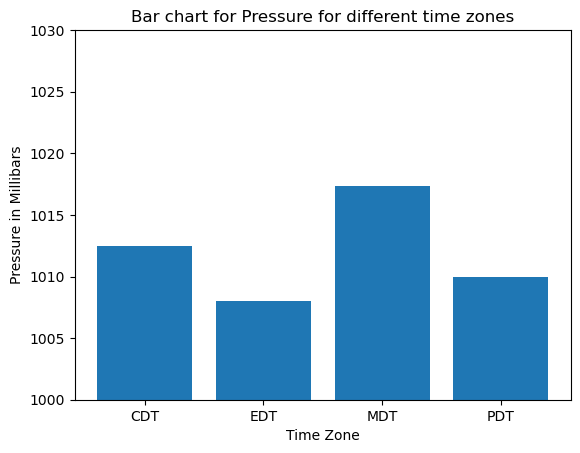

In [124]:
import matplotlib.pyplot as plt
plt.bar(web_api_df.groupby('Timezone')['Pressure'].mean().index,web_api_df.groupby('Timezone')['Pressure'].mean().values)
plt.title("Bar chart for Pressure for different time zones")
plt.ylim(1000,1030)
plt.xlabel("Time Zone")
plt.ylabel("Pressure in Millibars")


From the above bar chart, we can infer that the Mountain Time zone has comparitively higher pressure, although marginally than other time zones

Text(0, 0.5, 'Humidity in %')

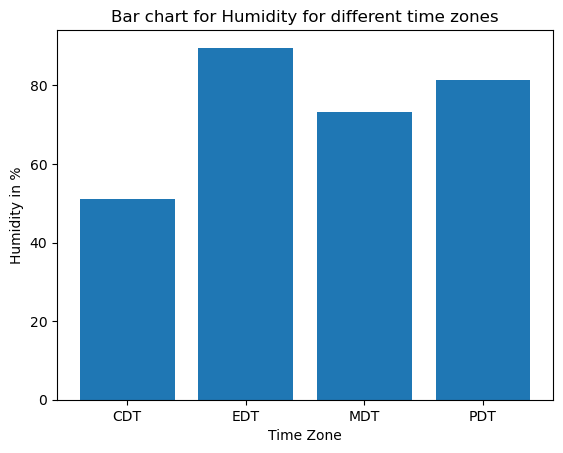

In [125]:
import matplotlib.pyplot as plt
plt.bar(web_api_df.groupby('Timezone')['Humidity'].mean().index,web_api_df.groupby('Timezone')['Humidity'].mean().values)
plt.title("Bar chart for Humidity for different time zones")
plt.xlabel("Time Zone")
plt.ylabel("Humidity in %")

From the above bar chart, we can infer that the Mountain Time zone has comparitively higher humidity,than other time zones.

# Step 9:

Blending all the three datasets into a single dataset by using join statements and extracting the columns from 3 different tables.

In [208]:
with sqlite3.connect('weather.db') as conn:
    
    web_api_flat_df = pd.read_sql("select f.*,a.Humidity,w.latitude,w.longitude,w.Timezone,a.Pressure \
    from websitedata as w join apidata a on w.latitude=a.Lat and w.longitude=a.Lon join flatfile f on \
    w.latitude=f.latitude and w.longitude=f.longitude",conn)
        
print ("The blended dataset from all the three tables is,\n",web_api_flat_df)

The blended dataset from all the three tables is,
           station                                         name  latitude  \
0     USW00014734  NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US  40.68275   
1     USW00014734  NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US  40.68275   
2     USW00014734  NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US  40.68275   
3     USW00014734  NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US  40.68275   
4     USW00014734  NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US  40.68275   
...           ...                                          ...       ...   
1357  USW00094789             JFK INTERNATIONAL AIRPORT, NY US  40.63915   
1358  USW00094789             JFK INTERNATIONAL AIRPORT, NY US  40.63915   
1359  USW00094789             JFK INTERNATIONAL AIRPORT, NY US  40.63915   
1360  USW00094789             JFK INTERNATIONAL AIRPORT, NY US  40.63915   
1361  USW00094789             JFK INTERNATIONAL AIRPORT, NY US  40.63915   

      longitude  elevation        da

# Step 10:

Various visualization for date, maximum / minimum temperature, snow days and windspeed for the station USW00014734 from the blended 3 dataset

(array([1., 6., 3., 4., 4., 1., 6., 4., 0., 1.]),
 array([38. , 40.8, 43.6, 46.4, 49.2, 52. , 54.8, 57.6, 60.4, 63.2, 66. ]),
 <BarContainer object of 10 artists>)

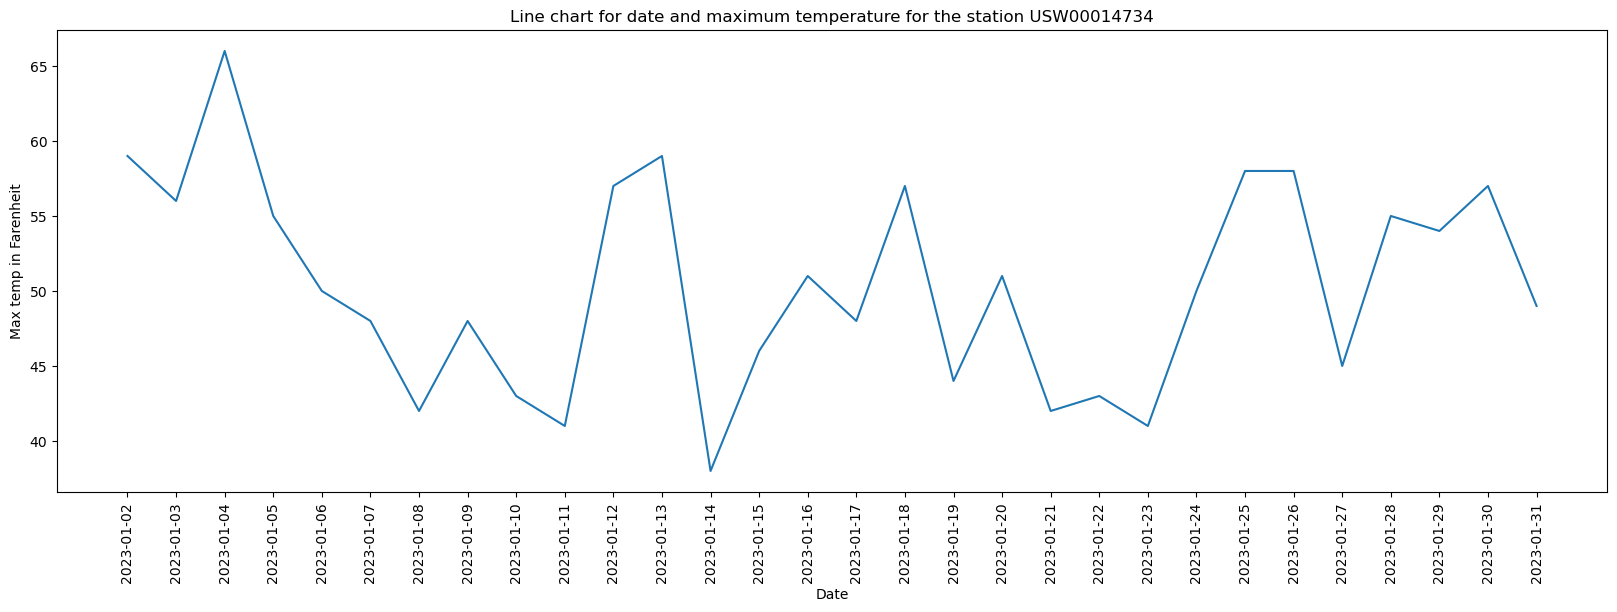

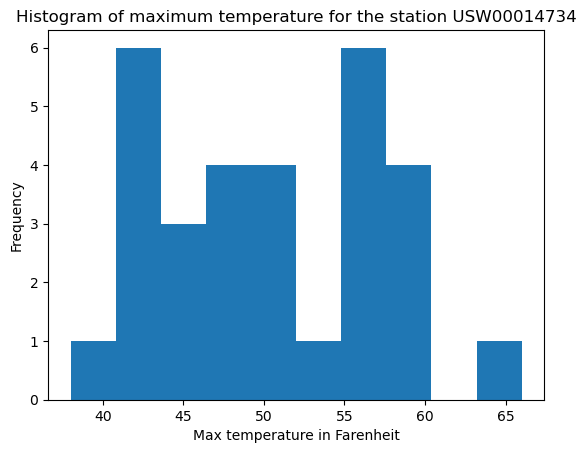

In [273]:
plt.figure(figsize=(20, 6)) 
plt.xticks(rotation=90)
plt.title("Line chart for date and maximum temperature for the station USW00014734")
plt.xlabel("Date")
plt.ylabel("Max temp in Farenheit")
plt.plot(web_api_flat_df[(web_api_flat_df["date"] > '2023-01-01') & (web_api_flat_df["date"] < '2023-02-01') & (web_api_flat_df["station"]== 'USW00014734')]['date'],web_api_flat_df[(web_api_flat_df["date"] > '2023-01-01') & (web_api_flat_df["date"] < '2023-02-01') & (web_api_flat_df["station"]== 'USW00014734')]['temp_max'])

plt.figure(2)
plt.title("Histogram of maximum temperature for the station USW00014734")
plt.xlabel("Max temperature in Farenheit")
plt.ylabel("Frequency")
plt.hist(web_api_flat_df[(web_api_flat_df["date"] > '2023-01-01') & (web_api_flat_df["date"] < '2023-02-01') & (web_api_flat_df["station"]== 'USW00014734')]['temp_max'])

From the above output of maximum temperature for the particular station USW00014734 and over a period of 15 days, we have found that there is a wide variation in temperature from 65 to 38 degree Farenheit.  

From the above histogram of max temperature, we can infer it is bimodal with either 42 or 58 degrees farenheit, depending upon the various day of the year.   


(array([4., 5., 1., 6., 8., 2., 1., 1., 1., 2.]),
 array([29. , 31.1, 33.2, 35.3, 37.4, 39.5, 41.6, 43.7, 45.8, 47.9, 50. ]),
 <BarContainer object of 10 artists>)

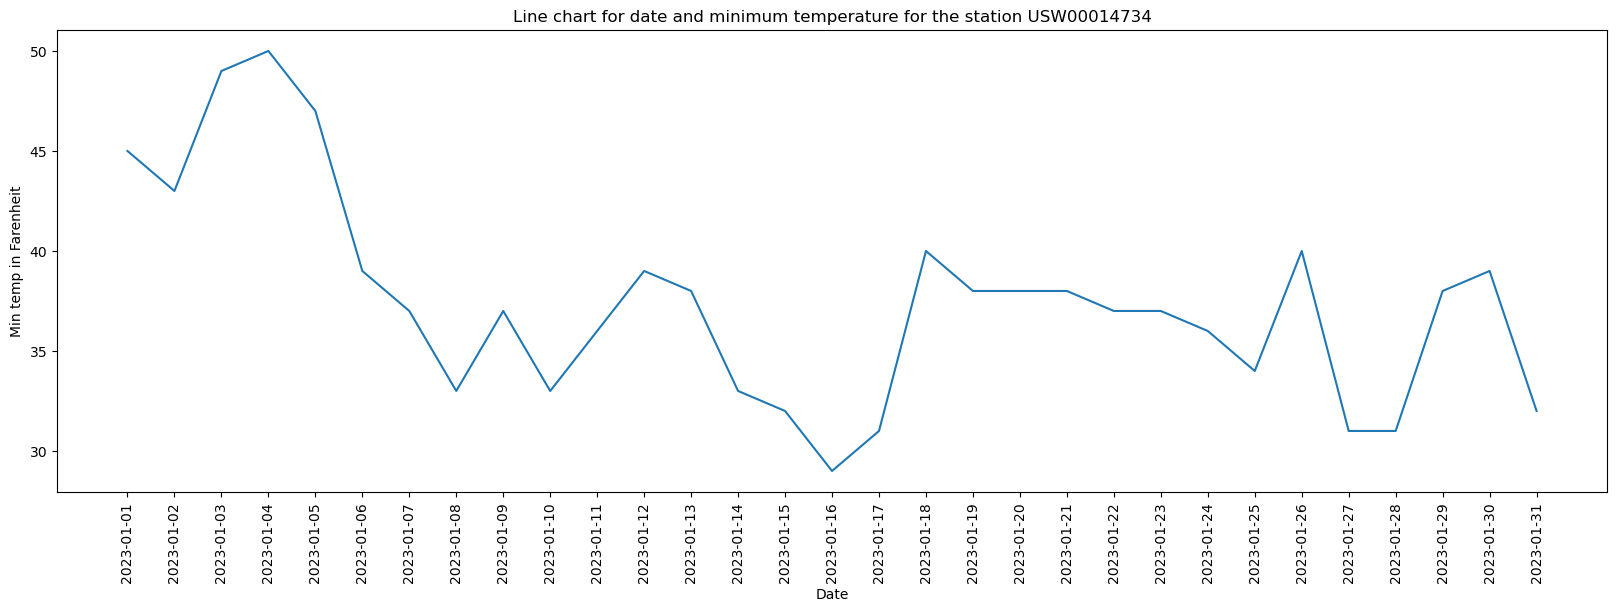

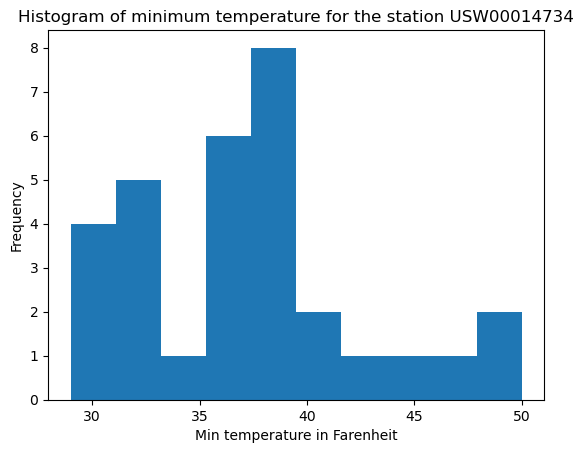

In [274]:
plt.figure(figsize=(20, 6)) 
plt.xticks(rotation=90)
plt.title("Line chart for date and minimum temperature for the station USW00014734")
plt.xlabel("Date")
plt.ylabel("Min temp in Farenheit")
with sqlite3.connect('weather.db') as conn:
    cursor=conn.cursor()
    cursor.execute("select f.date,f.temp_min \
    from websitedata as w join apidata a on w.latitude=a.Lat and w.longitude=a.Lon join flatfile f on \
    w.latitude=f.latitude and w.longitude=f.longitude where f.date between '2023-01-01' and '2023-01-31' and f.station== 'USW00014734'")
    output=cursor.fetchall()
    date=[i[0] for i in output]
    temp_min=[i[1] for i in output]
    plt.plot(date,temp_min)    

plt.figure(2)
plt.title("Histogram of minimum temperature for the station USW00014734")
plt.xlabel("Min temperature in Farenheit")
plt.ylabel("Frequency")
plt.hist(temp_min)

From the above output of minimum temperature for the particular station USW00014734 and over a period of 30 days, we have found that the minimum temperature has reduced from high of 50 to low of 32 degree Farenheit.  

From the above histogram we can infer that the minimum temperature is mostly around 38 degree farenheit.  


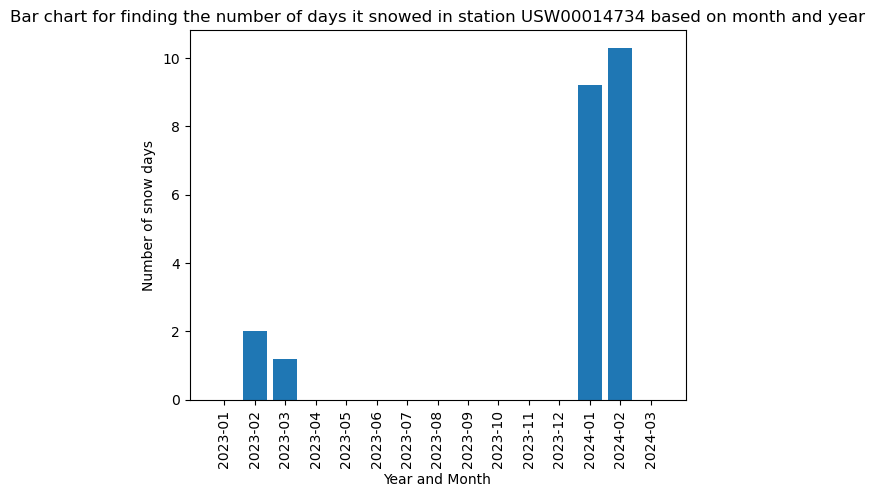

In [257]:
plt.xticks(rotation=90)
plt.title("Bar chart for finding the number of days it snowed in station USW00014734 based on month and year")
plt.xlabel("Year and Month")
plt.ylabel("Number of snow days")
with sqlite3.connect('weather.db') as conn:
    cursor=conn.cursor()
    cursor.execute("select \
    strftime('%Y-%m',f.date) as month,\
    sum(f.snow_days)\
    from \
    websitedata as w \
    join \
    apidata a on w.latitude=a.Lat and w.longitude=a.Lon \
    join \
    flatfile f on w.latitude=f.latitude and w.longitude=f.longitude \
    where \
    f.date between '2023-01-01' and '2024-29-03' and f.station== 'USW00014734'\
    GROUP BY \
    strftime('%Y-%m',f.date)")
    output=cursor.fetchall()
    year_month=[i[0] for i in output]
    snow_days=[i[1] for i in output]
    plt.bar(year_month,snow_days) 



From the above chart, we can infer that usually it snows at the begining months of the year.  
However, the snow days were more in the year 2024, when compared to 2023

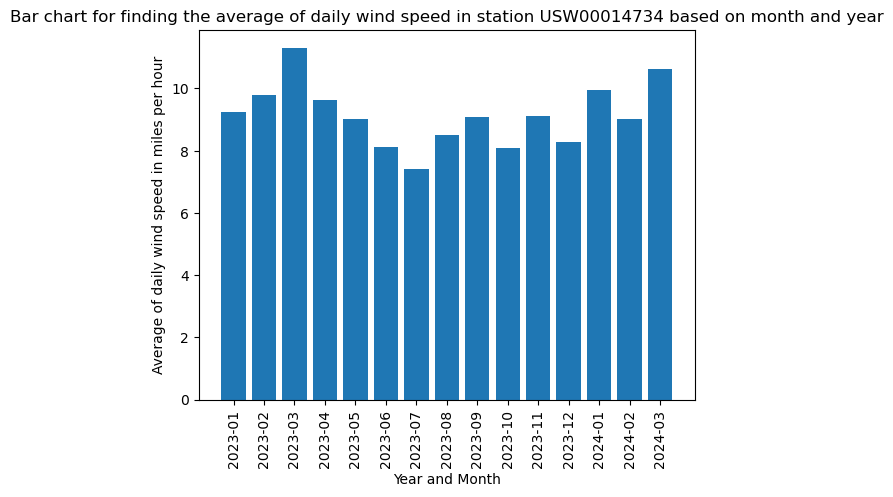

In [259]:
plt.xticks(rotation=90)
plt.title("Bar chart for finding the average of daily wind speed in station USW00014734 based on month and year")
plt.xlabel("Year and Month")
plt.ylabel("Average of daily wind speed in miles per hour")
with sqlite3.connect('weather.db') as conn:
    cursor=conn.cursor()
    cursor.execute("select \
    strftime('%Y-%m',f.date) as month,\
    avg(f.avg_daily_wind_speed)\
    from \
    websitedata as w \
    join \
    apidata a on w.latitude=a.Lat and w.longitude=a.Lon \
    join \
    flatfile f on w.latitude=f.latitude and w.longitude=f.longitude \
    where \
    f.date between '2023-01-01' and '2024-29-03' and f.station== 'USW00014734'\
    GROUP BY \
    strftime('%Y-%m',f.date)")
    output=cursor.fetchall()
    year_month=[i[0] for i in output]
    avg_daily_wind_speed=[i[1] for i in output]
    plt.bar(year_month,avg_daily_wind_speed) 

From the above analysis, we can infer that the speed of the wind is more in the first quarter of the year.

# What I learned in this class  

Data wrangling and Data preparation concepts.  
Python Datastructures, libraries and programming.  
Pandas dataframe manipulation.  
Visualization with matplotlib libary.  
Usage of different types of chart, to display visualization.  
Web scraping and retrieving data from API.  
Manipulating Time Series data.  
SQL statements.  



# Ethical Implications  

1.  What changes were made to the data?  

This data has been sourced from 3 different sources through website, API and flatfile and then merged to form a final dataset.  

Reading and understanding the dataset.  
Checking for the null values and dropping few of the columns based on that.  
In one of the datasource, dropping the columns with the "attribute" keyword in it, as it would not be used. This helps to reduce the size of dataset.  
Replacing the header names with more human readable format.  
Checking for duplicates in the data.  
Finding outliers.  
Finding if there are any rows with incorrect casing.  
Checking for temperatures with more than certain digits.  
Converting the temperatures from kelvin to Farenheit units.  

2.  Are there any legal or regulatory guidelines for your data or project topic?  

No, there are no legal or regulatory guidelines for my data. The data has only the information related to weather for a particular demography and it is freely available.  

3. What risks could be created based on the transformations done?

Some of the rows would have been dropped by using the above transformation of dropping the rows with NaN values.  
The collected data is based on a narrow timeframe.  So we cannot completely generalize the weather pattern based on this analysis.  

4.  Did you make any assumptions in cleaning/transforming the data?

The only assumption in one of the dataset made is dropping the columns with the "attribute" keyword in it, as it would not be used. However, this would not affect the quality of the dataset

5.  How was your data sourced / verified for credibility?  

Following are the 3 sources of data from where it was required  

NOAA (National Centers for Environmental Information) Retrieved April 1, 2024 from https://www.ncdc.noaa.gov/cdo-web/search The original file downloaded from the above website has been uploaded to the following website, as the original file link would not be available after 30 days, https://bellevueuniversity.sharepoint.com/:x:/r/sites/DSC540DataPreparation/Shared%20Documents/DSC%20540%20T301%20T302%20T303%202245%20Spring%202024/3648669.csv?d=w637d82bb846a45e78c877f4a77c4e12e&csf=1&web=1&e=qJcnvj  

Weather.gov Retrieved May 4, 2024 from https://forecast.weather.gov  

Openweathermap Retrieved May 11, 2024 from https://api.openweathermap.org/  

6.  Was your data acquired in an ethical way?  

Yes, it is.  The data is freely available online in the downloadable format.  

7.  How would you mitigate any of the ethical implications you have identified?  

The only ethical implication would be on how to interpret the data and forecast it. However, forecasting using this dataset is beyond the scope of this project. So, no ethical implications as of now.  


# Blended human readable data.

Following is the data after blending 3 datasets.  
It has few NaN values, but it does not affect this scope of the project as those fields has not been used for analysis.  


In [275]:
with sqlite3.connect('weather.db') as conn:
    
    web_api_flat_df = pd.read_sql("select f.*,a.Humidity,w.latitude,w.longitude,w.Timezone,a.Pressure \
    from websitedata as w join apidata a on w.latitude=a.Lat and w.longitude=a.Lon join flatfile f on \
    w.latitude=f.latitude and w.longitude=f.longitude",conn)
        
print ("The blended dataset from all the three tables is,\n",web_api_flat_df)

The blended dataset from all the three tables is,
           station                                         name  latitude  \
0     USW00014734  NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US  40.68275   
1     USW00014734  NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US  40.68275   
2     USW00014734  NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US  40.68275   
3     USW00014734  NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US  40.68275   
4     USW00014734  NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US  40.68275   
...           ...                                          ...       ...   
1357  USW00094789             JFK INTERNATIONAL AIRPORT, NY US  40.63915   
1358  USW00094789             JFK INTERNATIONAL AIRPORT, NY US  40.63915   
1359  USW00094789             JFK INTERNATIONAL AIRPORT, NY US  40.63915   
1360  USW00094789             JFK INTERNATIONAL AIRPORT, NY US  40.63915   
1361  USW00094789             JFK INTERNATIONAL AIRPORT, NY US  40.63915   

      longitude  elevation        da